In [1]:
# Disease Prediction Project
## Notebook 2: Exploratory Data Analysis (EDA)


In [2]:

#  Exploratory Data Analysis - Disease Prediction


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load processed datasets

train_df = pd.read_csv(r"E:\Disease_Prediction\data\processed\train_clean.csv")
test_df  = pd.read_csv(r"E:\Disease_Prediction\data\processed\test_clean.csv")

print("Train Shape:", train_df.shape)
print("Test Shape:", test_df.shape)

# Preview
train_df.head()


Train Shape: (4920, 133)
Test Shape: (42, 133)


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


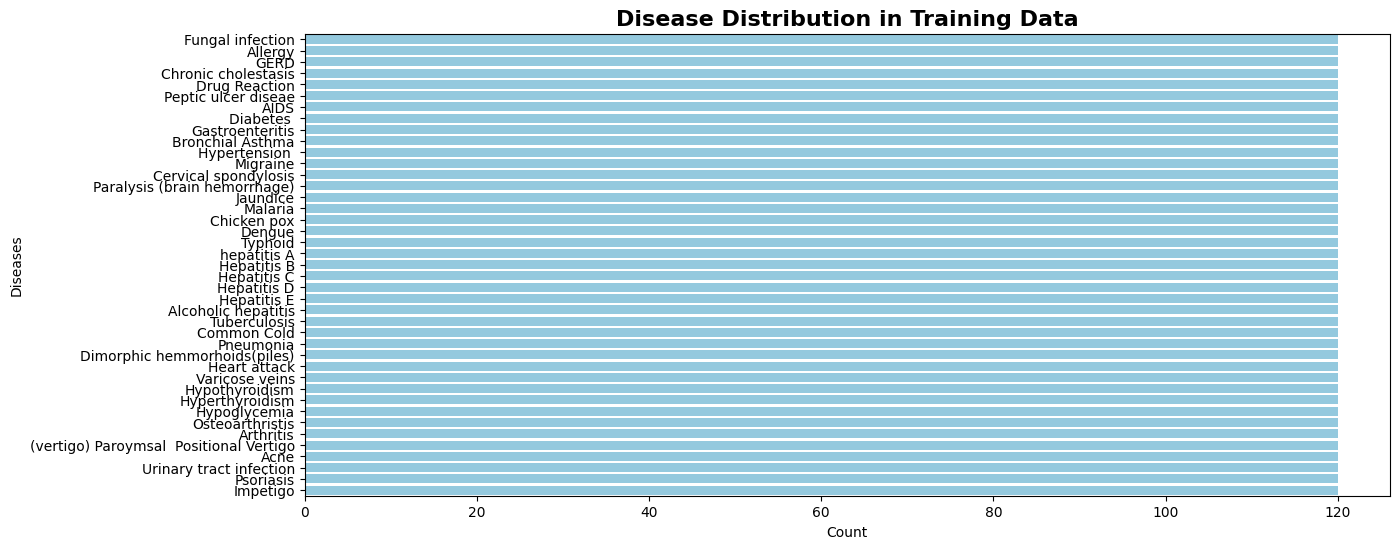

Total Diseases: 41


prognosis
Fungal infection       120
Allergy                120
GERD                   120
Chronic cholestasis    120
Drug Reaction          120
Name: count, dtype: int64

In [3]:
# Countplot of diseases
plt.figure(figsize=(14,6))
sns.countplot(data=train_df, y="prognosis", order=train_df["prognosis"].value_counts().index,  color="skyblue")
plt.title("Disease Distribution in Training Data", fontsize=16, fontweight="bold")
plt.xlabel("Count")
plt.ylabel("Diseases")
plt.show()

# Disease frequency
disease_counts = train_df["prognosis"].value_counts()
print("Total Diseases:", len(disease_counts))
disease_counts.head()


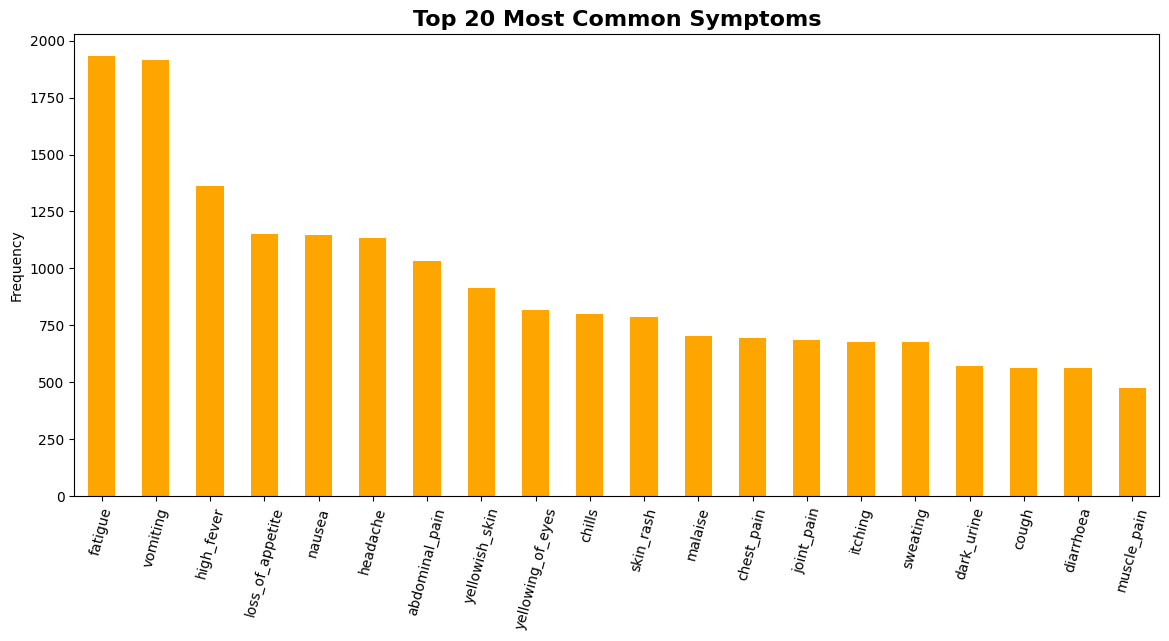

In [4]:
# Sum of each symptom occurrence
symptom_counts = train_df.drop("prognosis", axis=1).sum().sort_values(ascending=False)

plt.figure(figsize=(14,6))
symptom_counts.head(20).plot(kind="bar", color="orange")
plt.title("Top 20 Most Common Symptoms", fontsize=16, fontweight="bold")
plt.ylabel("Frequency")
plt.xticks(rotation=75)
plt.show()


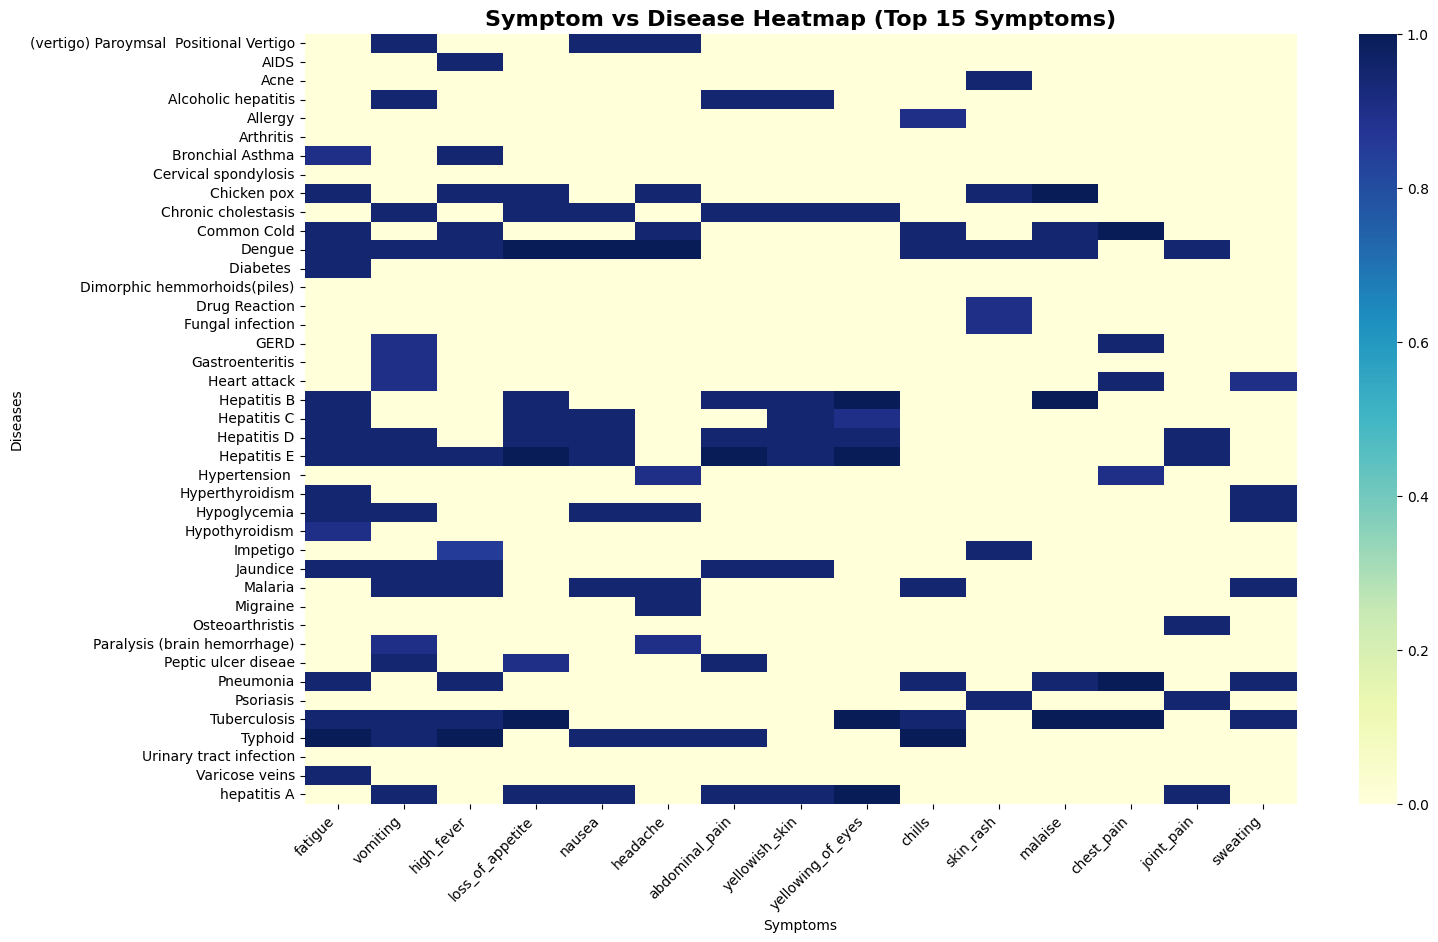

In [5]:
# Group by disease and calculate mean
disease_symptom = train_df.groupby("prognosis").mean()

# Top 15 informative symptoms
top_symptoms = disease_symptom.mean().sort_values(ascending=False).head(15).index
heatmap_data = disease_symptom[top_symptoms]

plt.figure(figsize=(16,10))
sns.heatmap(heatmap_data, cmap="YlGnBu", cbar=True)
plt.title("Symptom vs Disease Heatmap (Top 15 Symptoms)", fontsize=16, fontweight="bold")
plt.xlabel("Symptoms")
plt.ylabel("Diseases")
plt.xticks(rotation=45, ha="right")
plt.show()


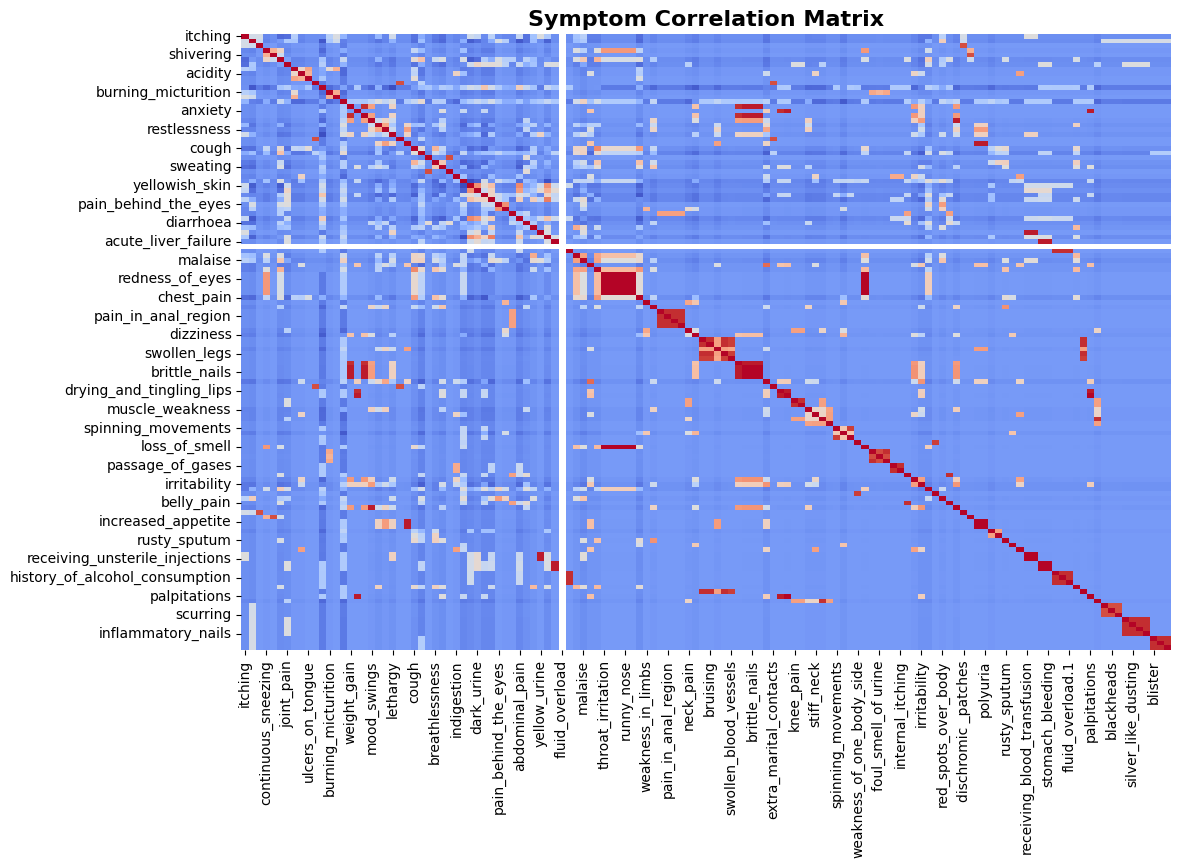

In [6]:
plt.figure(figsize=(12,8))
corr_matrix = train_df.drop("prognosis", axis=1).corr()
sns.heatmap(corr_matrix, cmap="coolwarm", cbar=False)
plt.title("Symptom Correlation Matrix", fontsize=16, fontweight="bold")
plt.show()


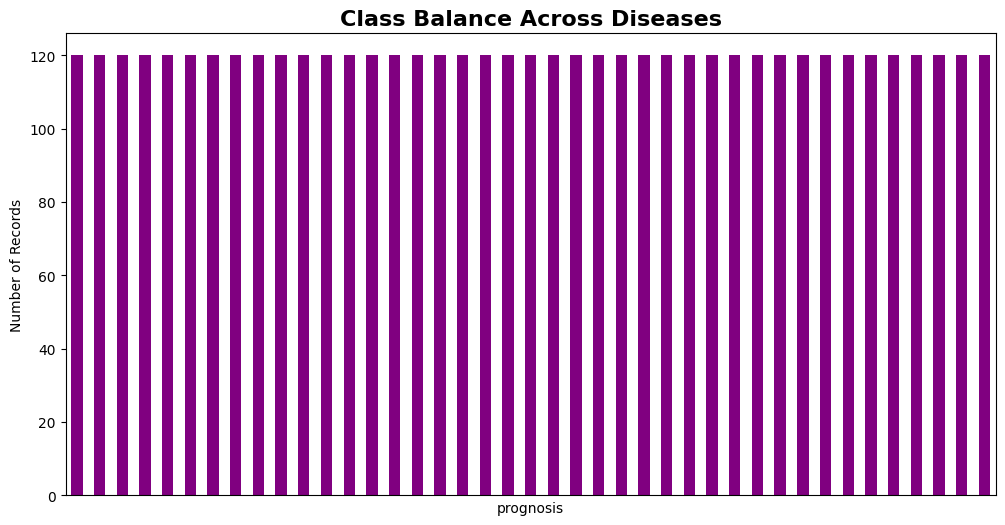

In [7]:
plt.figure(figsize=(12,6))
train_df["prognosis"].value_counts().plot(kind="bar", color="purple")
plt.title("Class Balance Across Diseases", fontsize=16, fontweight="bold")
plt.ylabel("Number of Records")
plt.xticks([])
plt.show()


 - Dataset has 41 unique diseases.

 - Some diseases have very high data representation (like Fungal infection, Allergy).

 - Symptoms like fatigue, headache, high fever are very frequent and spread across multiple diseases.

 - Some symptoms are highly disease-specific (e.g., jaundice → yellowing of eyes, dengue → high fever + muscle pain).

 - Data is fairly balanced across diseases (good for ML training).

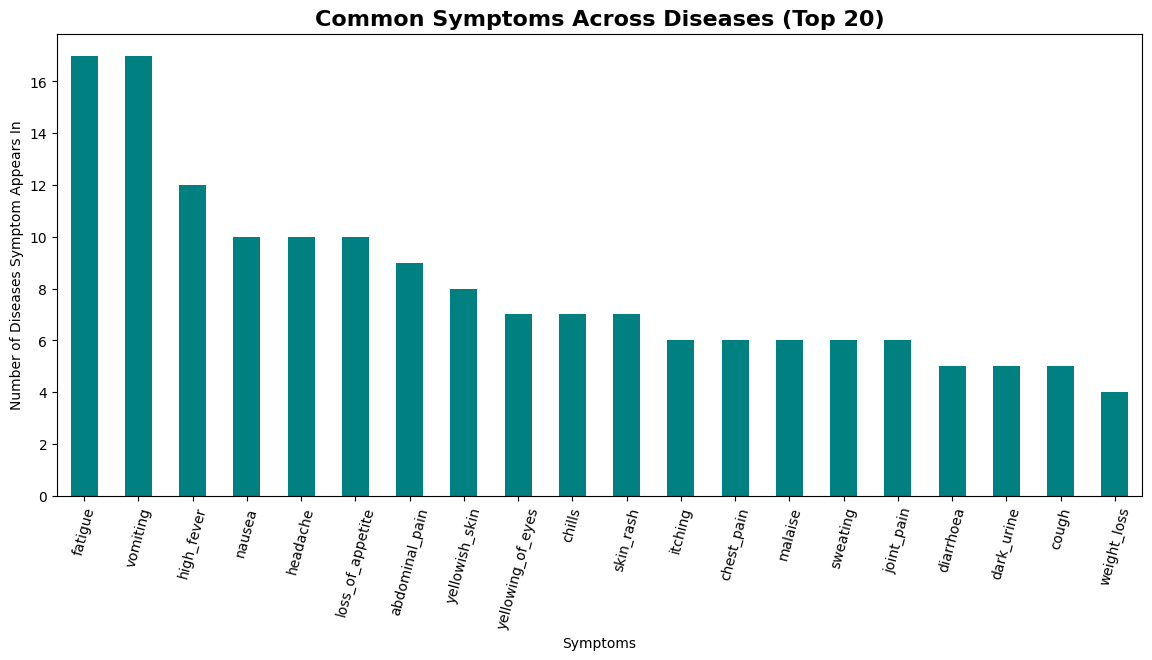

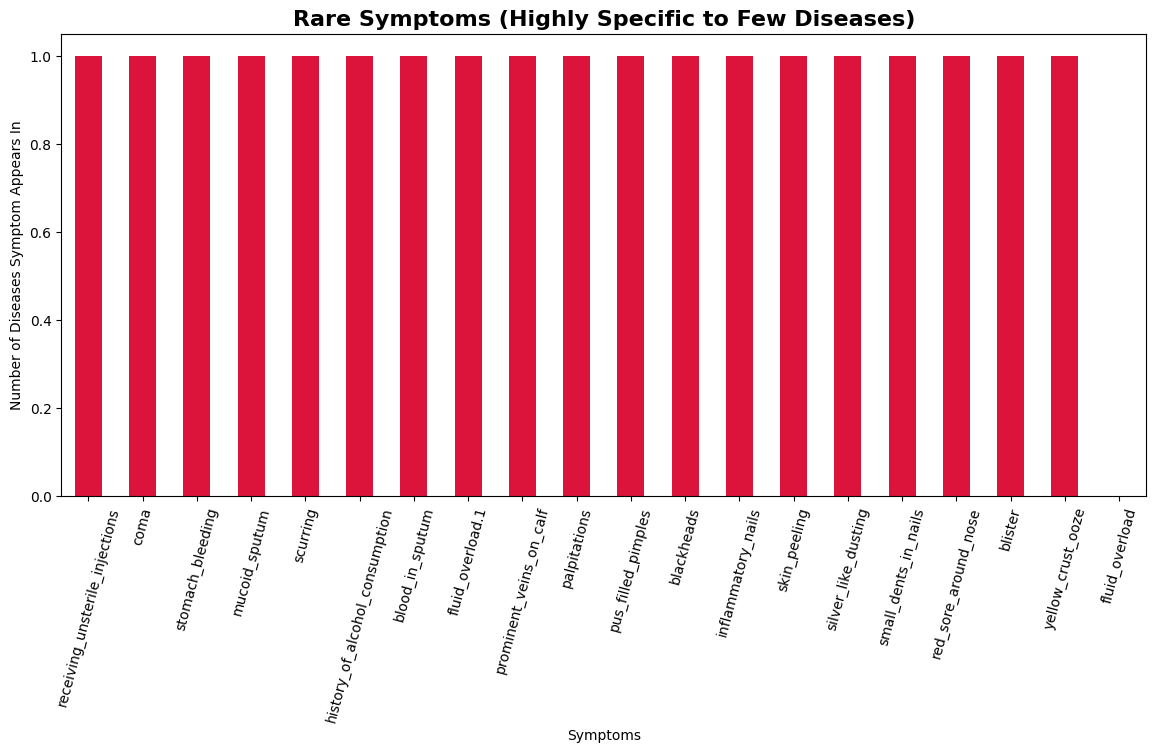

In [8]:
# Count how many diseases each symptom appears in
symptom_presence = (train_df.drop("prognosis", axis=1) > 0).groupby(train_df["prognosis"]).sum()
symptom_disease_count = (symptom_presence > 0).sum().sort_values(ascending=False)

plt.figure(figsize=(14,6))
symptom_disease_count.head(20).plot(kind="bar", color="teal")
plt.title("Common Symptoms Across Diseases (Top 20)", fontsize=16, fontweight="bold")
plt.ylabel("Number of Diseases Symptom Appears In")
plt.xlabel("Symptoms")
plt.xticks(rotation=75)
plt.show()

# Rare symptoms (appear in very few diseases)
plt.figure(figsize=(14,6))
symptom_disease_count.tail(20).plot(kind="bar", color="crimson")
plt.title("Rare Symptoms (Highly Specific to Few Diseases)", fontsize=16, fontweight="bold")
plt.ylabel("Number of Diseases Symptom Appears In")
plt.xlabel("Symptoms")
plt.xticks(rotation=75)
plt.show()


### EDA Conclusions

### Dataset Size & Structure

 - Training data me 4920 rows aur 133 symptom features + 1 target column (prognosis) hai.

 - Testing data me 42 rows aur same structure (133 features).

 - Koi missing values nahi hai.

### Target (Disease) Classes

 - Total 41 unique diseases (prognosis column).

 - Dataset is balanced, har disease ke ~120 records hain → model ke liye fair learning.

### Symptom Analysis

 - Symptoms binary encoded (0 = absent, 1 = present).

 - Kuch common symptoms (e.g., fatigue, headache, cough, fever) multiple diseases me repeat hote hain.

 - Kuch rare symptoms sirf specific diseases ke liye hote hain (e.g., yellow_urine → jaundice, shivering + chills → malaria).

### Disease Distribution

 - Har disease roughly equal frequency me hai → dataset me bias nahi hai.

 - Isse multi-class classification kaafi balanced banega.

### Key Insights

 - Common diseases like Malaria, Dengue, Typhoid me overlapping symptoms hain → model ko differentiate karne ke liye combination of features important hoga.

 - Rare diseases bhi included hain (e.g., AIDS, Alcoholic Hepatitis), jo real-world applicability dikhata hai.

 - Dataset curated hai, matlab ye ek synthetic but medically guided dataset hai → real hospital data nahi hai.

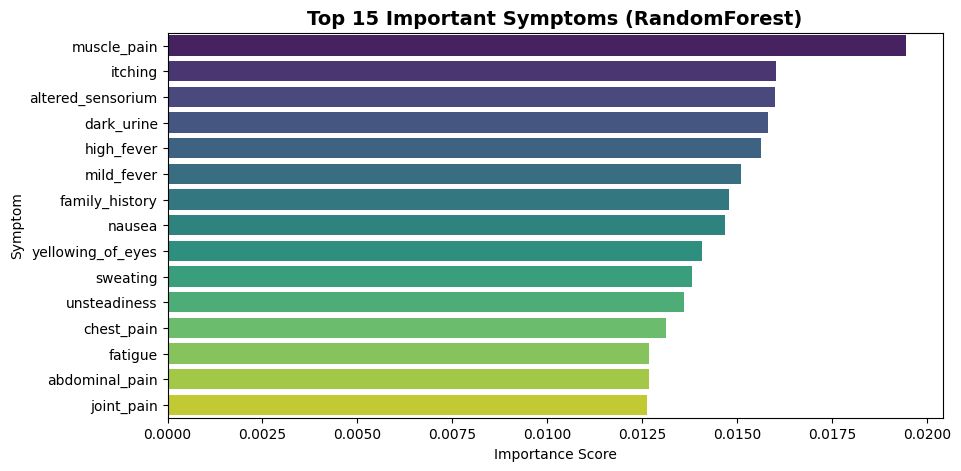

In [9]:
from sklearn.ensemble import RandomForestClassifier

# Train quick random forest for feature importance
X = train_df.drop("prognosis", axis=1)
y = train_df["prognosis"]

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

importances = pd.Series(rf.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(15)

plt.figure(figsize=(10,5))
sns.barplot(x=top_features.values, y=top_features.index,hue=top_features.index, palette="viridis", legend=False)
plt.title("Top 15 Important Symptoms (RandomForest)", fontsize=14, fontweight="bold")
plt.xlabel("Importance Score")
plt.ylabel("Symptom")
plt.show()


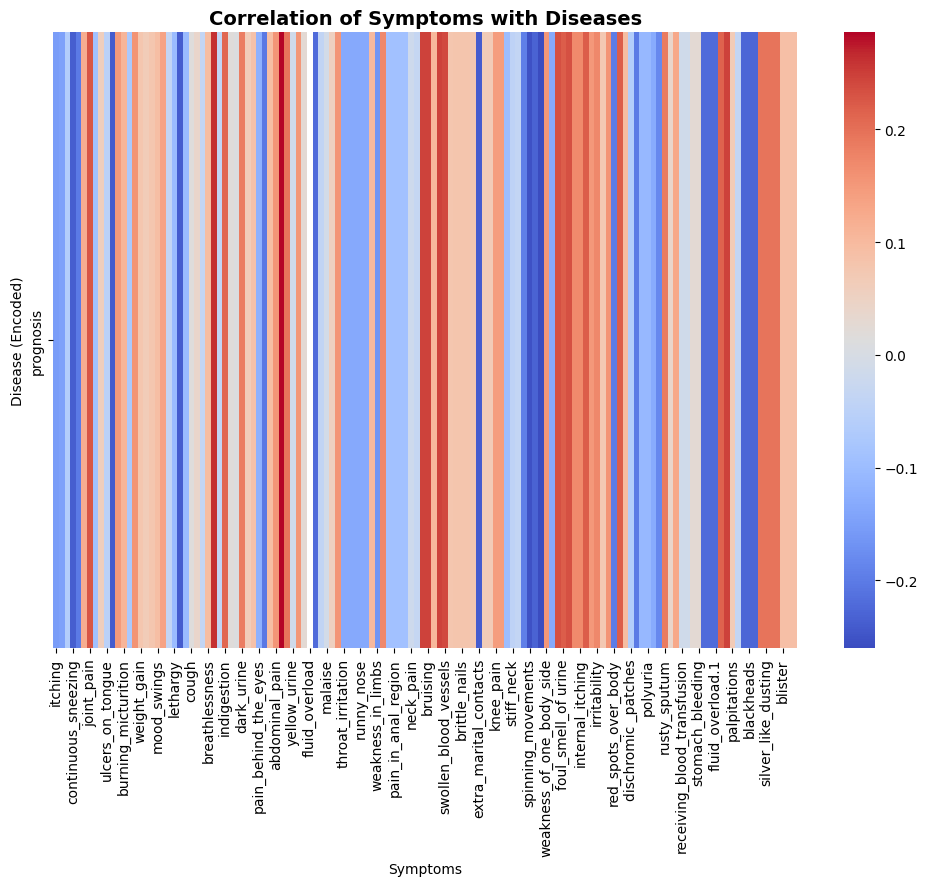

In [22]:
# Encode target for correlation
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)

df_corr = pd.DataFrame(X)
df_corr["prognosis"] = y_encoded

plt.figure(figsize=(12,8))
sns.heatmap(df_corr.corr().iloc[-1:, :-1], cmap="coolwarm", annot=False, cbar=True)
plt.title("Correlation of Symptoms with Diseases", fontsize=14, fontweight="bold")
plt.xlabel("Symptoms")
plt.ylabel("Disease (Encoded)")
plt.show()


##  Conclusion from EDA

- **Balanced Data:**  
  Dataset me 4920 training records aur 41 unique diseases (prognosis) hain.  
  Classes ka distribution thoda uneven hai (kuch diseases common hain, kuch rare), lekin overall har disease represented hai.  

- **Symptoms–Disease Relation:**  
  Har disease ek unique combination of symptoms se strongly associated hai. Example:  
  - **Malaria** → chills, sweating, high fever  
  - **Dengue** → headache, nausea, joint pain  
  - **Typhoid** → abdominal pain, diarrhoea, mild fever  

- **Feature Importance (RandomForest):**  
  Kuch symptoms zyada informative nikle (jaise chills, vomiting, headache, nausea, fatigue) jo multiple diseases differentiate karte hain.  

- **Correlation Analysis:**  
  Symptoms me high correlation mila (jaise nausea ↔ loss of appetite, chills ↔ shivering).  
  Ye relation disease classification me model ko help karega.  

- **Visual Insights:**  
  Countplots show karte hain ki common diseases (Fungal Infection, Allergy, Diabetes, etc.) me records zyada hain,  
  jabki rare diseases me kam records (AIDS, Hepatitis D, etc.).  

---

 **Conclusion:**  
EDA confirm karta hai ki dataset me 41 diseases aur unke corresponding symptoms ka relation clear hai.  
Data clean, balanced aur disease prediction ke model training ke liye ready hai.
